<a href="https://colab.research.google.com/github/eneaiten/Codes_MT/blob/main/150min_Parvo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np

file = "/content/ES_05_150min_Parvo_PLA.xlsx"
gxt_raw = pd.read_excel(file, header=None)

# Trova la riga header ("Time")
start_row = gxt_raw[
    gxt_raw.apply(lambda r: r.astype(str).str.contains("Time", case=False, na=False)).any(axis=1)
].index[0]

# Trova la prima riga numerica dopo l'header
def is_real_number(x):
    if pd.isna(x):
        return False
    try:
        float(x)
        return True
    except:
        return False

numeric_start = gxt_raw.iloc[start_row+1:, 0].apply(is_real_number).idxmax()

# Seleziona solo la parte dai dati numerici in poi
sub_gxt = gxt_raw.iloc[numeric_start:, :]

# Trova il primo NaN nella colonna 0
first_nan_idx = sub_gxt[sub_gxt.iloc[:, 0].isna()].index
if len(first_nan_idx) > 0:
    last_valid_idx = first_nan_idx[0] - 1
else:
    last_valid_idx = sub_gxt.index[-1]

# Taglio definitivo
clean = sub_gxt.loc[:last_valid_idx].copy()

# Inserisci header
headers = gxt_raw.iloc[start_row].tolist()
clean.columns = headers

#reset index
clean.reset_index(drop=True, inplace=True)
clean.columns.values[12]='VE/VO2'
clean.columns.values[13]='VE/VCO2'


# Mostra tabella pulita
display(clean)
display(clean.info())


,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/VO2,VE/VCO2,PECO2,PEO2,PetCO2,PetO2
0,0.275333,0.610958,12.862282,3.674938,0.478908,20.583891,0.783863,29.055689,0.708429,17.478941,2.881916,82.5,33.691151,42.980915,21.38382,129.693741,21.622461,129.083466
1,15.851167,0.005179,0.109027,0.031151,0.004104,0.192367,0.792457,0.256808,0.74907,17.794874,2.645889,89,37.145348,46.873623,19.632498,132.037964,34.868908,127.547409
2,16.005501,0.685962,14.441303,4.126087,0.520694,30.85651,0.759071,32.397408,0.952438,18.361843,2.101245,108,44.982834,59.260399,15.591237,136.244873,16.784266,135.336319
3,16.278002,1.443607,30.391733,8.683352,1.163908,40.330734,0.80625,33.027519,1.221125,16.745651,3.565034,109,27.937468,34.651138,26.452549,124.252731,26.876537,123.917671
4,16.512169,1.608912,33.87183,9.677666,1.331099,42.972794,0.827328,34.1637,1.257849,16.532585,3.823484,112,26.709227,32.283703,28.370255,122.671783,28.599901,122.453407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,154.264618,1.695176,35.68792,10.196548,1.328029,44.765747,0.783416,38.610039,1.159433,16.524792,3.663671,135,26.407724,33.708416,27.184435,122.613953,27.371853,122.307739
195,154.51442,1.670295,35.164104,10.046887,1.316572,44.866802,0.788227,40.026684,1.120922,16.594816,3.624306,134,26.861603,34.078506,26.892353,123.133537,27.099058,122.784706
196,154.772568,1.574535,33.148102,9.470886,1.221084,41.886234,0.775521,38.734669,1.081363,16.564676,3.600932,130.5,26.602293,34.30249,26.718914,122.909897,26.938564,122.481781
197,155.003387,1.475585,31.064947,8.875699,1.142214,39.347538,0.774076,34.65704,1.13534,16.576469,3.585845,128.5,26.665722,34.448471,26.60697,122.997406,26.897646,122.468353


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TIME      199 non-null    object
 1   VO2       199 non-null    object
 2   VO2/kg    199 non-null    object
 3   METS      199 non-null    object
 4   VCO2      199 non-null    object
 5   VE        199 non-null    object
 6   RER       199 non-null    object
 7   RR        199 non-null    object
 8   Vt        199 non-null    object
 9   FEO2      199 non-null    object
 10  FECO2     199 non-null    object
 11  HR        199 non-null    object
 12  VE/VO2    199 non-null    object
 13  VE/VCO2   199 non-null    object
 14  PECO2     199 non-null    object
 15  PEO2      199 non-null    object
 16  PetCO2    199 non-null    object
 17  PetO2     199 non-null    object
dtypes: object(18)
memory usage: 28.1+ KB


None

In [50]:
clean.columns = (clean.columns.str.strip().str.lower().str.replace(' ', '_'))
# creo una maschera per i dati che mi interessano
mask = (
    (clean['time']>=17.1) & (clean['time']<=20.1) |
    (clean['time']>=32.1) & (clean['time']<=35.1) |
    (clean['time']>=47.1) & (clean['time']<=50.1) |
    (clean['time']>=62.1) & (clean['time']<=65.1) |
    (clean['time']>=77.1) & (clean['time']<=80.1) |
    (clean['time']>=92.1) & (clean['time']<=95.1) |
    (clean['time']>=107.1) & (clean['time']<=110.1) |
    (clean['time']>=122.1) & (clean['time']<=125.1) |
    (clean['time']>=137.1) & (clean['time']<=140.1) |
    (clean['time']>=152.1) & (clean['time']<=155.1)
)

prolonged_data = clean[mask].reset_index(drop=True)
display(prolonged_data)

,time,vo2,vo2/kg,mets,vco2,ve,rer,rr,vt,feo2,feco2,hr,ve/vo2,ve/vco2,peco2,peo2,petco2,peto2
0,17.258167,1.70512,35.897266,10.256362,1.553894,46.629135,0.911311,36.120399,1.290936,16.556759,4.11024,114,27.34654,30.007917,30.497984,122.851151,30.722464,121.664108
1,17.512501,1.768077,37.222675,10.63505,1.616969,50.289845,0.914536,39.318478,1.279038,16.722866,3.967144,125.5,28.443241,31.101295,29.436205,124.083664,29.708826,122.375656
2,17.750668,1.668653,35.129536,10.03701,1.549985,47.839302,0.928884,37.788662,1.26597,16.74334,3.997264,130,28.669413,30.864359,29.659702,124.23558,29.923214,123.282631
3,18.019163,1.595478,33.589001,9.596857,1.479514,45.71899,0.927317,37.243942,1.227555,16.742676,3.992529,119.5,28.655363,30.90136,29.624563,124.230652,29.897301,123.895592
4,18.26333,1.642909,34.587551,9.882157,1.509214,47.315048,0.918623,36.860069,1.28364,16.771412,3.935883,118,28.799561,31.350794,29.204248,124.443878,29.452156,124.160698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,154.005615,1.714111,36.086555,10.310445,1.334366,44.828133,0.77846,38.081802,1.177154,16.486536,3.675908,134,26.152405,33.59507,27.27524,122.330101,27.475605,122.026001
116,154.264618,1.695176,35.68792,10.196548,1.328029,44.765747,0.783416,38.610039,1.159433,16.524792,3.663671,135,26.407724,33.708416,27.184435,122.613953,27.371853,122.307739
117,154.51442,1.670295,35.164104,10.046887,1.316572,44.866802,0.788227,40.026684,1.120922,16.594816,3.624306,134,26.861603,34.078506,26.892353,123.133537,27.099058,122.784706
118,154.772568,1.574535,33.148102,9.470886,1.221084,41.886234,0.775521,38.734669,1.081363,16.564676,3.600932,130.5,26.602293,34.30249,26.718914,122.909897,26.938564,122.481781


In [51]:
points_per_step = 12
prolonged_data['Step'] = [i // points_per_step for i in prolonged_data.index]
prolonged_data['Time'] = [i // points_per_step * 15 + 15 for i in prolonged_data.index]
display(prolonged_data)

,time,vo2,vo2/kg,mets,vco2,ve,rer,rr,vt,feo2,feco2,hr,ve/vo2,ve/vco2,peco2,peo2,petco2,peto2,Step,Time
0,17.258167,1.70512,35.897266,10.256362,1.553894,46.629135,0.911311,36.120399,1.290936,16.556759,4.11024,114,27.34654,30.007917,30.497984,122.851151,30.722464,121.664108,0,15
1,17.512501,1.768077,37.222675,10.63505,1.616969,50.289845,0.914536,39.318478,1.279038,16.722866,3.967144,125.5,28.443241,31.101295,29.436205,124.083664,29.708826,122.375656,0,15
2,17.750668,1.668653,35.129536,10.03701,1.549985,47.839302,0.928884,37.788662,1.26597,16.74334,3.997264,130,28.669413,30.864359,29.659702,124.23558,29.923214,123.282631,0,15
3,18.019163,1.595478,33.589001,9.596857,1.479514,45.71899,0.927317,37.243942,1.227555,16.742676,3.992529,119.5,28.655363,30.90136,29.624563,124.230652,29.897301,123.895592,0,15
4,18.26333,1.642909,34.587551,9.882157,1.509214,47.315048,0.918623,36.860069,1.28364,16.771412,3.935883,118,28.799561,31.350794,29.204248,124.443878,29.452156,124.160698,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,154.005615,1.714111,36.086555,10.310445,1.334366,44.828133,0.77846,38.081802,1.177154,16.486536,3.675908,134,26.152405,33.59507,27.27524,122.330101,27.475605,122.026001,9,150
116,154.264618,1.695176,35.68792,10.196548,1.328029,44.765747,0.783416,38.610039,1.159433,16.524792,3.663671,135,26.407724,33.708416,27.184435,122.613953,27.371853,122.307739,9,150
117,154.51442,1.670295,35.164104,10.046887,1.316572,44.866802,0.788227,40.026684,1.120922,16.594816,3.624306,134,26.861603,34.078506,26.892353,123.133537,27.099058,122.784706,9,150
118,154.772568,1.574535,33.148102,9.470886,1.221084,41.886234,0.775521,38.734669,1.081363,16.564676,3.600932,130.5,26.602293,34.30249,26.718914,122.909897,26.938564,122.481781,9,150


In [52]:
means_step = prolonged_data.groupby('Step').mean().reset_index()
means_step['Time'] = means_step['Time'].astype(int)
subset_means_step = means_step[['Step','Time','hr','vo2','vco2','ve', 've/vo2','ve/vco2']]
display(subset_means_step)


,Step,Time,hr,vo2,vco2,ve,ve/vo2,ve/vco2
0,0,15,122.333333,1.611896,1.482347,46.135096,28.641977,31.138765
1,1,30,133.166667,1.564309,1.409126,46.114288,29.49524,32.728
2,2,45,118.041667,1.562105,1.350737,44.906894,28.755965,33.244599
3,3,60,118.916667,1.620116,1.363642,45.52603,28.109062,33.380021
4,4,75,122.166667,1.587214,1.334737,44.154028,27.834857,33.082211
5,5,90,125.625,1.662782,1.369906,45.150513,27.163965,32.963962
6,6,105,128.166667,1.69224,1.344571,45.147763,26.683654,33.578698
7,7,120,127.666667,1.65491,1.332858,44.843624,27.115714,33.650199
8,8,135,131.625,1.636674,1.325444,44.881297,27.434859,33.872244
9,9,150,133.583333,1.661686,1.2984,44.021269,26.504172,33.913282


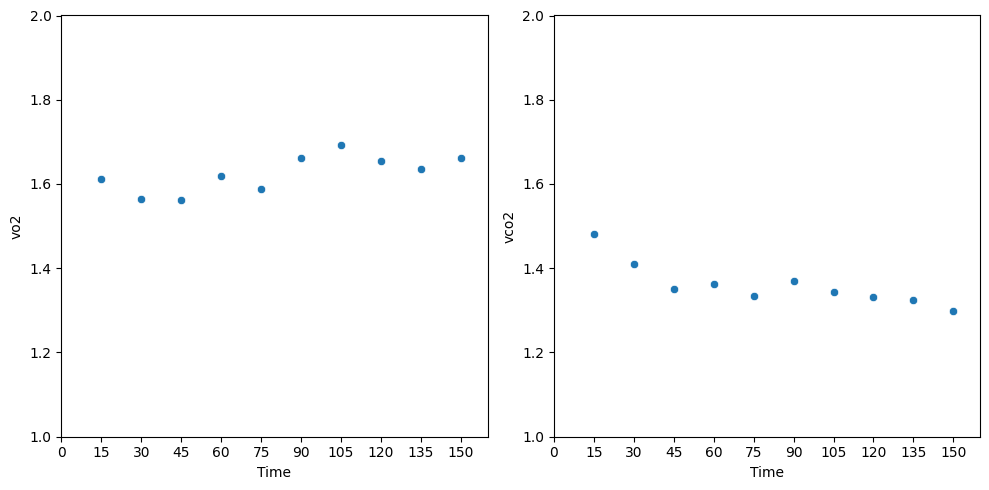

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=subset_means_step, x='Time', y='vo2', ax=axes[0])
sns.scatterplot(data=subset_means_step, x='Time', y='vco2', ax=axes[1])

axes[0].set_xlim(0,160)
axes[0].set_ylim(1,2)
axes[0].set_xticks(range(0,160,15))
axes[0].set_yticks(np.arange(1, 2.01, 0.2))
axes[1].set_xlim(0,160)
axes[1].set_ylim(1,2)
axes[1].set_xticks(range(0,160,15))
axes[1].set_yticks(np.arange(1, 2.01, 0.2))

plt.tight_layout()
plt.show()

In [54]:
subset_means_step.to_excel('ES_05_hundredfiftymin_PLA.xlsx', index=False)